# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS4243_codes/codes/labs_lecture03/lab04_train_vanilla_nn'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [3]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

train_data=torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [4]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        # complete here
        # 一层全连接网络MLP
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        
        x = self.linear_layer(x) # complete here
        # 使用softmax作为激活函数并输出
        # 注意对每一行的所有元素进行softmax运算
        # 列是不正确的
        p = torch.softmax(x, dim=1) # complete here
        
        return p

### Build the net

In [6]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Take the 4th image of the test set:

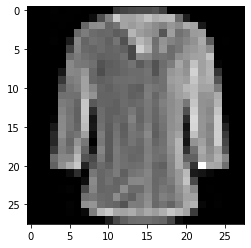

In [7]:
im = test_data[4] # complete here
utils.show(im)

### And feed it to the UNTRAINED network:

In [8]:
p = net( im.view(1,784) ) # complete here
print(p)

tensor([[0.0978, 0.1333, 0.0657, 0.1311, 0.0667, 0.1410, 0.0889, 0.0842, 0.0823,
         0.1090]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

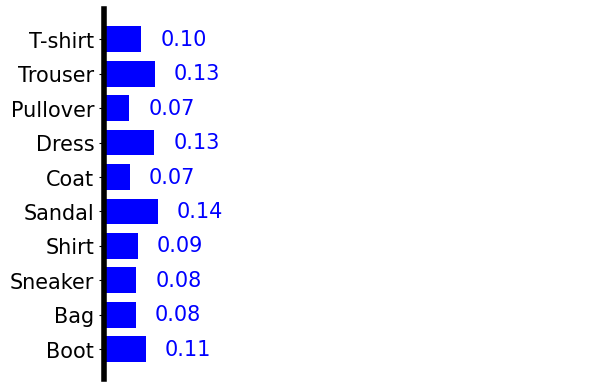

In [9]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [10]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network

    # complete here
    idx=randint(0, 60000-1)
    # complete here
    input=train_data[idx].view(1,784)
    # complete here
    label=train_label[idx].view(1)


    # feed the input to the net  
    input.requires_grad_() # for backprobagation -- we will discuss it later
    # complete here 
    prob=net(input)
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

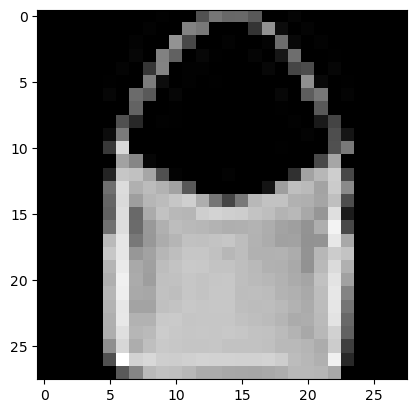

In [11]:
im= test_data[34] # complete here
utils.show(im)

### Feed it to the TRAINED net:

In [12]:
p = net( im.view(1,784)) # complete here
print(p)

tensor([[1.6817e-04, 1.3209e-05, 1.4200e-02, 1.8699e-03, 4.3869e-03, 3.4380e-02,
         7.6644e-03, 2.3668e-04, 9.3696e-01, 1.1896e-04]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

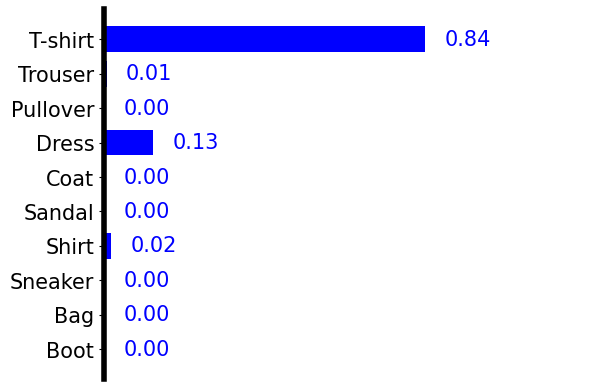

In [13]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

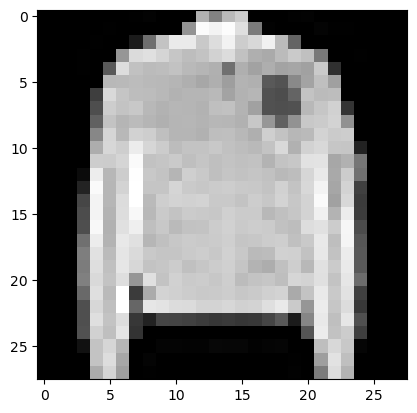

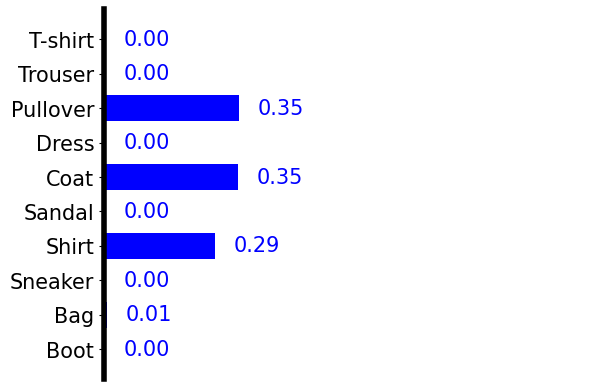

In [14]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)